# Homework 1: Basics

### 1. Floating Away
#### a. In your choice of programming language, create a floating point variable and initialize it to 0.1. Now, print it out in full precision (you may need to use format specifiers in your language to get all significant digits the computer tracks).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

bright = [(68,119,170), (102,204,238), (34, 136, 51), (204,187,68), (238,102,119), (170,51,119), (187,187,187)]    
for i in range(len(bright)):    
    r, g, b = bright[i]    
    bright[i] = (r / 255., g / 255., b / 255.)     
highc = [(255,255,255), (221,170,51), (187, 85, 102), (0,68,136), (0,0,0)]    
for i in range(len(highc)):    
    r, g, b = highc[i]    
    highc[i] = (r / 255., g / 255., b / 255.)    
vibrant =  [(0,119,187), (51,187,238), (0, 153, 136), (238,119,51), (204,51,17), (238,51,119), (187,187,187)]   
for i in range(len(vibrant)):    
    r, g, b = vibrant[i]    
    vibrant[i] = (r / 255., g / 255., b / 255.)    
muted =  [(51,34,136), (136,204,238), (68, 170, 153), (17,119,51), (153,153,51), (221,204,119), (204,102,119), (136,34,85), (170, 68, 153), (221,221,221)]  
for i in range(len(muted)):    
    r, g, b = muted[i]    
    muted[i] = (r / 255., g / 255., b / 255.)    
light = [(119,170,221), (153, 221, 255), (68,187,153), (187,204,51), (170,170,0), (238,221,136), (238,136,102), (255,170,187),(221,221,221)]
for i in range(len(light)):    
    r, g, b = light[i]    
    light[i] = (r / 255., g / 255., b / 255.)   
basic =[(0,119,187),(17,119,51),(204,51,17),(85,85,85)]    
for i in range(len(basic)):    
    r, g, b = basic[i]    
    basic[i] = (r / 255., g / 255., b / 255.)
greys = [(255./4. * 3., 255./4.*3., 255./4.*3.), (255./4. * 2., 255./4.*2., 255./4.*2. ), (255./4., 255./4., 255./4. )]
for i in range(len(greys)):    
    r, g, b = greys[i]    
    greys[i] = (r / 255., g / 255., b / 255.)

In [2]:
x = float(0.1)

print('%.64f'%x)

0.1000000000000000055511151231257827021181583404541015625000000000


#### You should see that it is not exactly 0.1 to the computer—this is the floating point error. The number 0.1 is not exactly representable in the binary format used for floating point. What is the degree of floating point error you find? How does this floating point error change if you declare variable as “single precision” versus “double precision”?

In [3]:
print("The floating point error for Python's default float is approximately: ", 5.5E-18)

The floating point error for Python's default float is approximately:  5.5e-18


In [4]:
#Defining 0.1 in numpy's single and double precision float methodology.
single = np.float32(0.1)
double = np.float64(0.1)

print("Single precision:", '%.64f'%single)
print("Double precision:", '%.64f'%double)

Single precision: 0.1000000014901161193847656250000000000000000000000000000000000000
Double precision: 0.1000000000000000055511151231257827021181583404541015625000000000


So we see that Python 3's built in float function is double precision. The floating point error is approximately 1.5e-9 for single precision and again 5.5e-18 for double precision.

#### b. Using the method you sketched out in class, determine the roundoff error, epsilon, for your machine

In [5]:
#Let's initialize epsilon as some small value that is within Python's precision
epsilon = float(1E-10)
#We want to find the value for epsilon where Python can no longer distuinguish it from zero, or when 1+epsilon = 1
print(1+epsilon)

1.0000000001


In [6]:
#We'll create a while loop that as long as this calculation is not equal to 1, it will half the value of epsilon
while (1+epsilon>1):
    epsilon = epsilon/2
print(epsilon)

9.5367431640625e-17


Thus the roundoff error for this machine is approximately 9.5e-17.

#### c. For kicks, check in with a couple of your classmates who have different hardware and/or operating systems. Compare your answers for (a) and (b). What do you find?

My machine is a MacMini M1, 8 core processor and 16GB of memory. When comparing with classmates, they got roughly the same order of magnitude, but slightly different values. One classmate running a Linux machine reported 2.2e-16. Another student with an Intel processor reported 1.1e-16. If I initialize my epsilon to just be 1, I arrive at 1.1e-16 as well. It appears that how you initialize epsilon matters for this rudimentary while loop.

When comparing this with the double precision error from part a, we see that this is actually 100x worse than defining 0.1 as a float. This is likely because the machine has more difficulty determining the difference between an integer and some really small floating point number.

### 2. Integral Processes
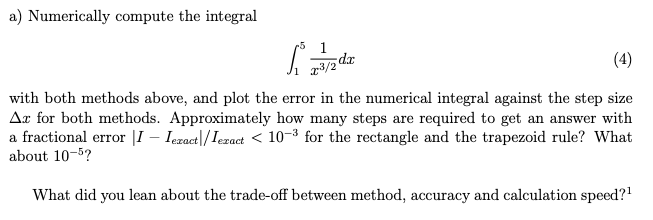

In [7]:
##Function to be integrated
def func(x):
    return 1/(x**(3/2))
##Rectangle rule
def rect_integ(a,b,N):
    I = [] #Initialize empty list
    deltax = (b-a)/N #definte the spacing interval based off input parameters
    #Loops over N points
    for i in range(1,N):
        x = a+(i-1)*deltax #x at current step
        val = func(x) #function value at current x
        I.append(val)
    return np.sum(I)*deltax
##Trapezoid rule
def trap_integ(a,b,N):
    I = [] #Initialize empty list
    deltax = (b-a)/N #definte the spacing interval based off input parameters
    #Loops over N points
    for i in range(1,N):
        x = a+(i-1)*deltax #x at current step
        xnew = a+i*deltax #x at next step
        val = (func(x)+func(xnew))/2 #function value at midpoint between x and xnew
        I.append(val)
    return np.sum(I)*deltax

In [8]:
a=1
b=5
N=10**4
print("The value of the integral with the rectangle rule with N = 10,000 is:", rect_integ(a,b,N))
print("The value of the integral with the trapezoid rule with N = 10,000 is:", trap_integ(a,b,N))

The value of the integral with the rectangle rule with N = 10,000 is: 1.1057191587171726
The value of the integral with the trapezoid rule with N = 10,000 is: 1.105537049407833


In [29]:
def error_find(a,b,N):
    Iexact = 2-2/np.sqrt(5) #exact solution from WolframAlpha
    errorRect = []
    errorTrap = []
    errRectIdx = []
    errTrapIdx = []
    #loop over both methods and store the error measurements in a list
    for i in N:
        Irect = rect_integ(a,b,i)
        errRect = np.abs(Irect-Iexact)/Iexact
        errorRect.append(errRect)
        Itrap = trap_integ(a,b,i)
        errTrap = np.abs(Itrap-Iexact)/Iexact
        errorTrap.append(errTrap)
    return errorRect, errorTrap

In [48]:
N = np.arange(10,1001,1) #N has been adjusted because the error calculation is poorly behaved for low N
a = 1
b = 5
rect, trap = error_find(a,b,N)

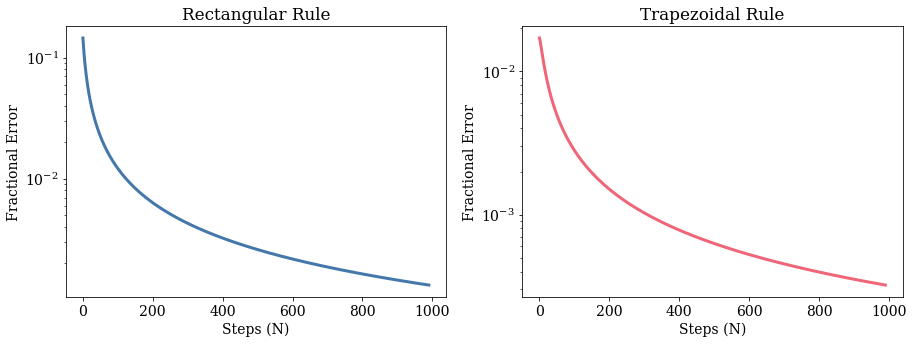

In [57]:
#plotting variances
plt.rc('font', family='serif',size=14);
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15, 5));
ax1.plot(rect,color=bright[0],linewidth=3);
ax1.set_yscale('log')
ax1.set_title('Rectangular Rule');
ax1.set_ylabel(r'Fractional Error');
ax1.set_xlabel('Steps (N)');
ax2.set_title('Trapezoidal Rule');
ax2.plot(trap,color=bright[4],linewidth=3);
ax2.set_yscale('log')
ax2.set_ylabel(r'Fractional Error');
ax2.set_xlabel('Steps (N)');

In [32]:
#Solving for the number of steps to get the error below 1E-3
N = np.arange(10,5001,1)
a = 1
b = 5
rect, trap = error_find(a,b,N)

In [33]:
cutRect = [i for i, val in enumerate(rect) if val <= 1E-3]
cutTrap = [i for i, val in enumerate(trap) if val <= 1E-3]
print('The error threshold crosses below 1e-3 at step',cutRect[0],'for the rectangular rule')
print('The error threshold crosses below 1e-3 at step',cutTrap[0],'for the trapezoidal rule')

The error threshold crosses below 1e-3 at step 1315 for the rectangular rule
The error threshold crosses below 1e-3 at step 309 for the trapezoidal rule


In [34]:
#Solving for the number of steps to get the error below 1E-5
N = np.arange(20000,200100,100)
a = 1
b = 5
rect, trap = error_find(a,b,N)

In [37]:
cutRect = [i for i, val in enumerate(rect) if val <= 1E-5]
cutTrap = [i for i, val in enumerate(trap) if val <= 1E-5]
print('The error threshold crosses below 1e-5 at approximately step',20000+cutRect[0]*100,'for the rectangular rule')
print('The error threshold crosses below 1e-5 at approximately step',20000+cutTrap[0]*100,'for the trapezoidal rule')

The error threshold crosses below 1e-5 at approximately step 132400 for the rectangular rule
The error threshold crosses below 1e-5 at approximately step 32400 for the trapezoidal rule


#### b) Compare the results of your two integration routines to a built-in function in your programming language (or another common package like Mathematica or Matlab). For example, if you’re using Python, you may use one of the functions available in the scipy.integrate module. In Mathematica, you could use the Integrate function. What is the order accuracy of the black-box method? What is the default approach to integration? What step sizes do you need above to obtain a similar result?

In [43]:
#Using scipy
from scipy import integrate
func = lambda x: 1/(x**(3/2))
val, err = integrate.quad(func, 1, 5)
print('Scipy.integrate returns a value of', val,'with an accuracy of',err)
print('The exact solutions is about',2-2/np.sqrt(5))

Scipy.integrate returns a value of 1.1055728090000843 with an accuracy of 5.444307667948631e-13
The exact solutions is about 1.1055728090000843


This seems much more accurate than my methods, and I would have to run a very, very large N with my method and my Python would scream to reach this order of accuracy.

### 3. Shooting for the stars
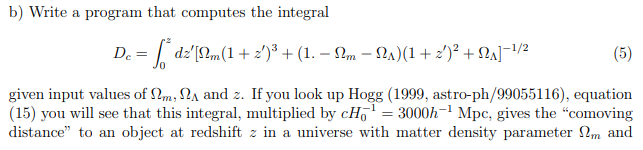
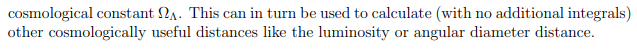

In [67]:
def comoving_dist(Omega_m,Omega_lamb,z):
    integrand = lambda z: (Omega_m*((1+z)**3) + (1-Omega_m-Omega_lamb)*((1+z)**2)+Omega_lamb)**(-1/2)
    D = integrate.quad(integrand,0,z)
    h = 0.7
    comoving = D[0] * 3000*(h**-1)
    return comoving

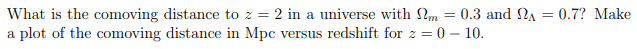

In [70]:
z = 2
Omega_m = 0.3
Omega_lamb = 0.7

comoving = comoving_dist(Omega_m,Omega_lamb,z)
print('The comoving distance with these parameters is approximately', comoving, 'Mpc')

The comoving distance with these parameters is approximately 5183.448018304756 Mpc


In [83]:
z = np.linspace(0,10,1000)
comoving_list = []
for i in range(len(z)):
    comoving = comoving_dist(Omega_m,Omega_lamb,z[i])
    comoving_list.append(comoving)

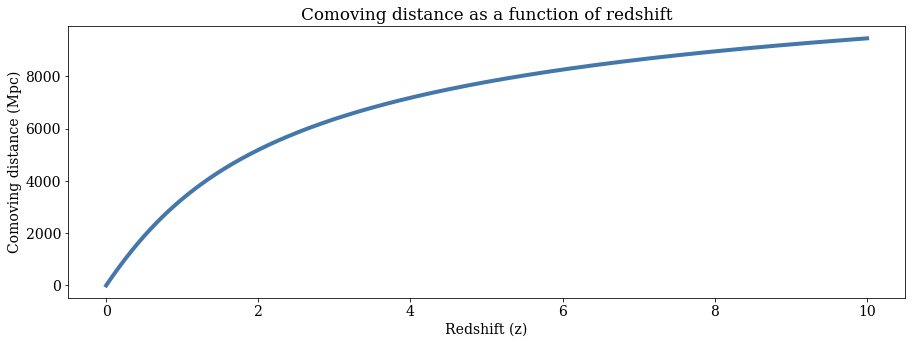

In [97]:
plt.rc('font', family='serif',size=14);
fig, ax1=plt.subplots(figsize=(15, 5));
ax1.plot(z,comoving_list,color=bright[0],linewidth=4);
ax1.set_title('Comoving distance as a function of redshift');
ax1.set_ylabel(r'Comoving distance (Mpc)');
ax1.set_xlabel('Redshift (z)');